In [24]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
all_file = glob.glob('../../data/processed/WESAD/feature_extracted/S*.csv')

In [20]:
df_all = pd.concat([pd.read_csv(file) for file in all_file], ignore_index=True, axis=0)

In [22]:
df_all

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8
1,39.252000,-47.664667,7.822000,62.549339,0.544205,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8
2,39.628667,-46.246667,9.764000,62.469299,1.120992,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8
3,38.927333,-48.439333,6.083333,62.442314,0.428267,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,46.964000,-8.760000,-7.498667,63.226677,2.985640,1.290620,0.053588,0.000966,23.230088,1.451065,81.961468,774.259868,238.947514,170.587935,70.270270,4.036088,2,15
1071,33.698667,3.725333,49.853333,62.980308,2.770939,1.290599,0.020151,-0.000114,25.608455,2.211387,101.350382,641.304348,252.891267,181.866120,88.888889,1.921900,2,15
1072,31.114000,4.294000,52.504667,62.972961,2.406421,1.332025,0.031676,0.000495,24.847170,1.932891,90.927874,699.776786,207.303412,159.144898,68.292683,1.107406,2,15
1073,28.826667,-17.737333,17.747333,63.635677,6.112821,1.373313,0.023374,0.000278,24.011434,1.701185,98.456919,655.539773,282.197210,195.836075,74.418605,15.788516,2,15


In [26]:
df_all.columns

Index(['ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean', 'net_acc_mean', 'net_acc_std',
       'EDA_mean', 'EDA_std', 'EDA_slope', 'RESP_rate', 'RESP_regularity',
       'HR', 'IBI', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf', 'label', 'subject'],
      dtype='object')

In [23]:
df_all.value_counts('label')

label
1    602
2    252
4    114
3    107
Name: count, dtype: int64

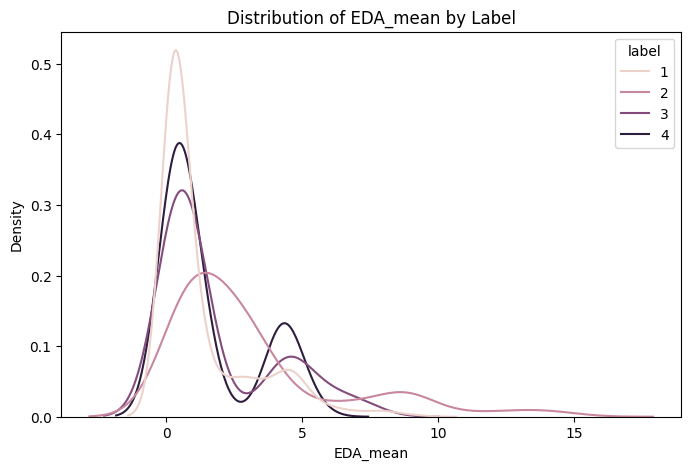

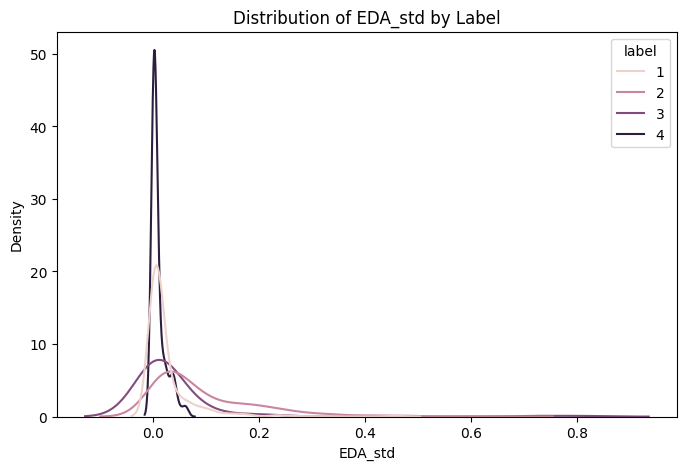

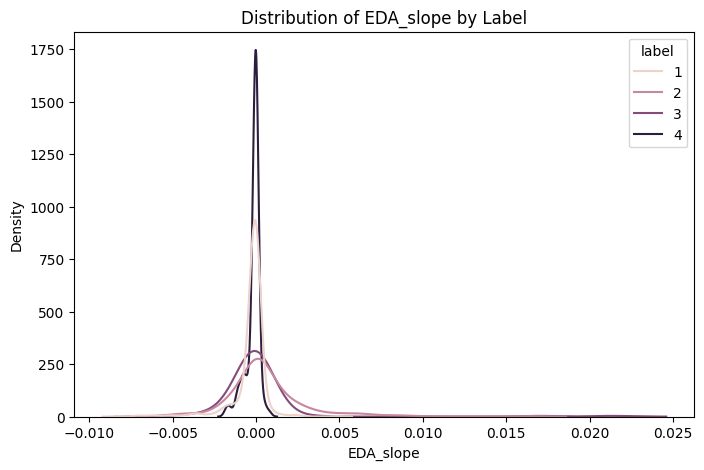

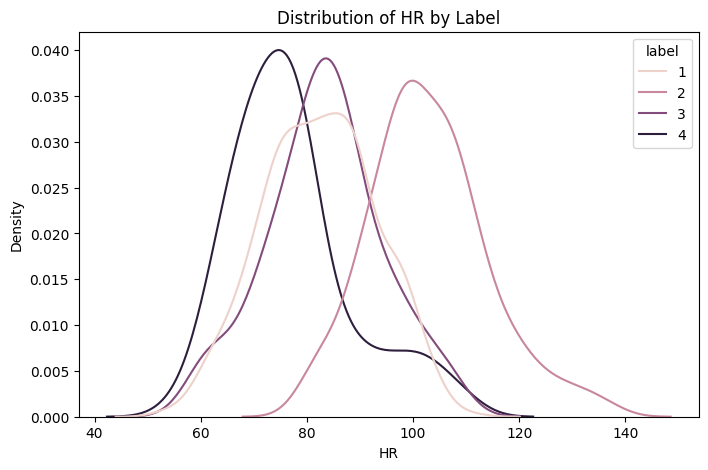

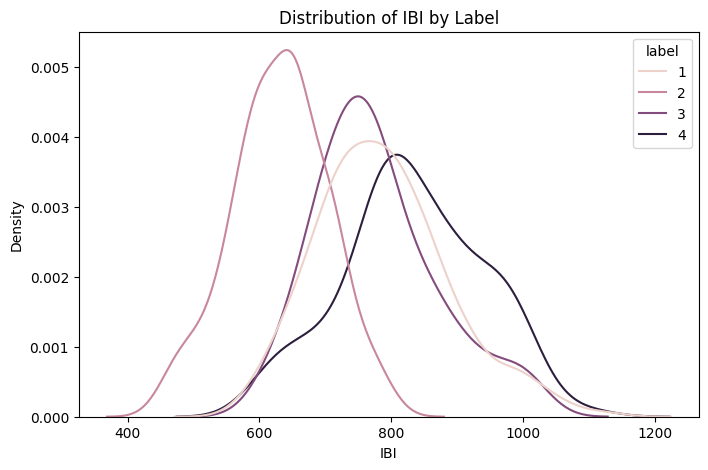

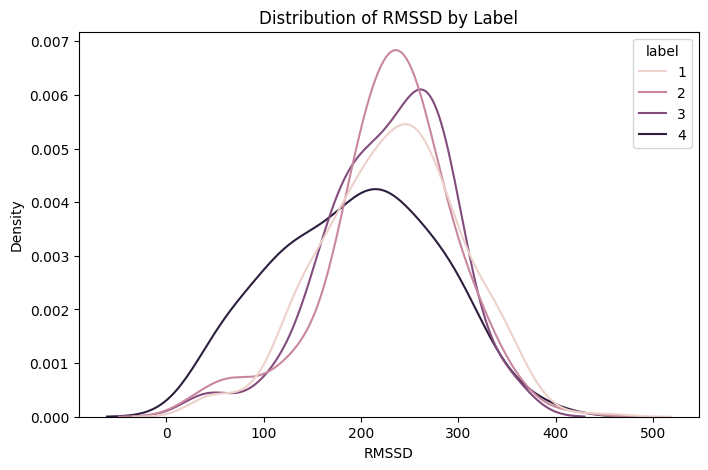

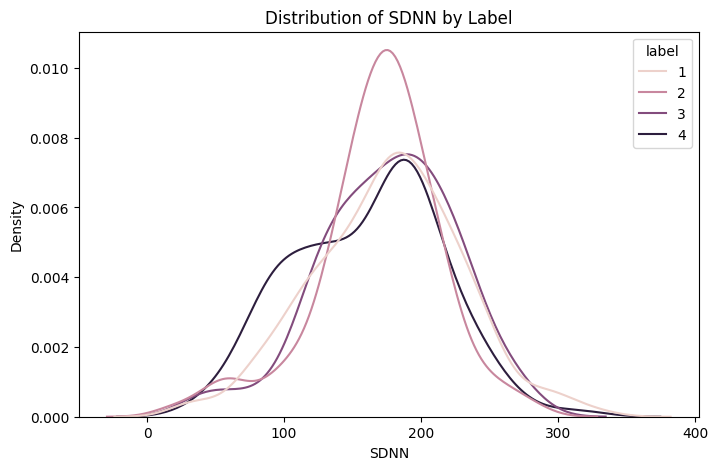

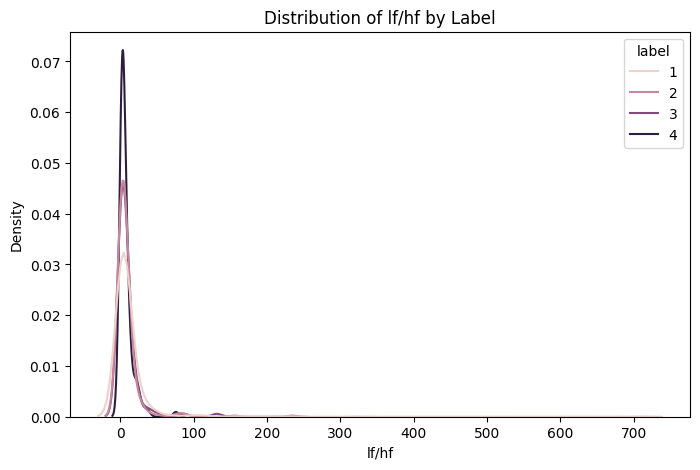

In [27]:
for feature in ['EDA_mean', 'EDA_std', 'EDA_slope','HR', 'IBI', 'RMSSD', 'SDNN', 'lf/hf']:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=df_all, x=feature, hue='label', common_norm=False)
    plt.title(f'Distribution of {feature} by Label')
    plt.show()

In [33]:
features = ['EDA_mean', 'EDA_std', 'EDA_slope','HR', 'IBI', 'RMSSD', 'SDNN', 'lf/hf']

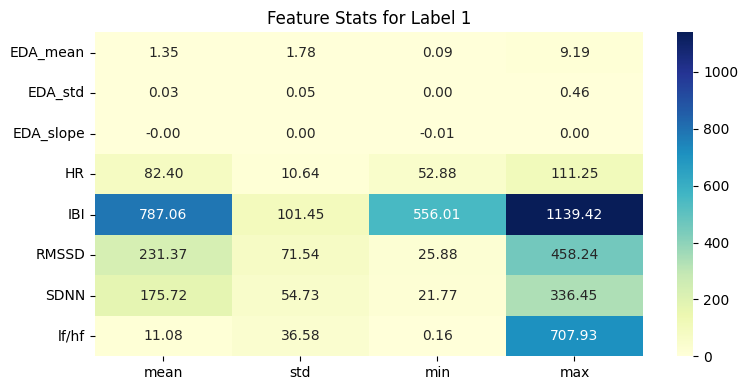

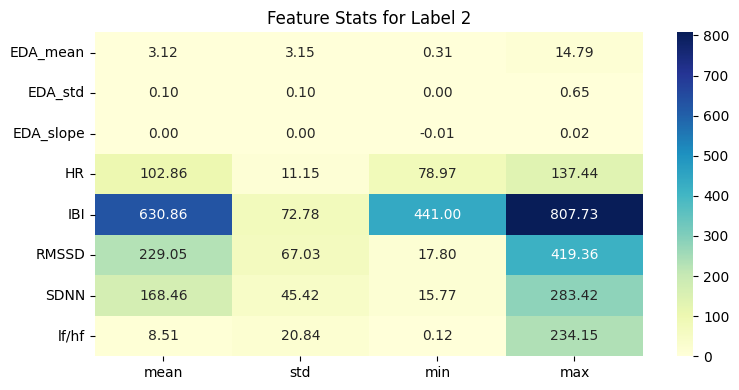

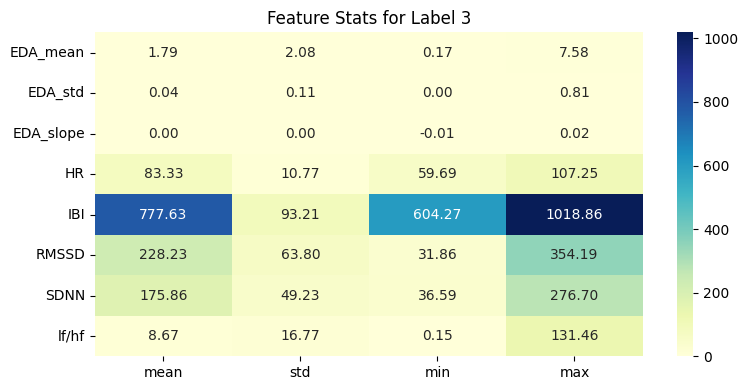

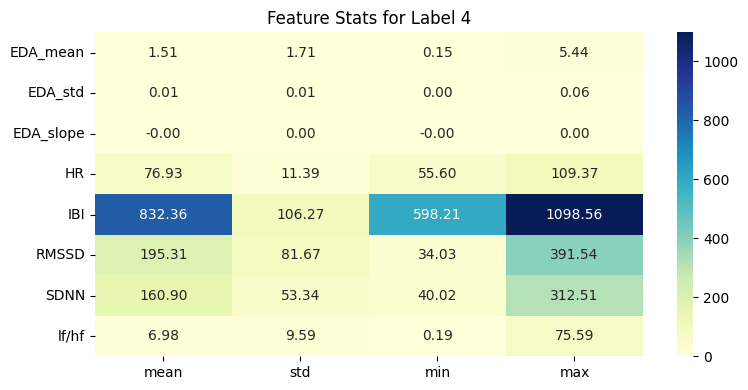

In [34]:
for lbl in sorted(df_all['label'].unique()):
    df_label = df_all[df_all['label'] == lbl][features]
    stats_df = df_label.describe().T[['mean', 'std', 'min', 'max']]  # หรือจะใช้แค่ 'mean' ก็ได้

    plt.figure(figsize=(8, 4))
    sns.heatmap(stats_df, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title(f"Feature Stats for Label {lbl}")
    plt.tight_layout()
    plt.show()